### Interpretability Cases:

The question relates to cool data set of 2000 women's pregnancies with bio and demo data about the patients.   
Target is whether the woman had a term or pre-term birth.  
The AUC was .83 on training, but much lower on production.  
So we are hoping you can provide a perspective on why and if we can do anything in the future to improve it. 

In [7]:
# imports
import h2o 
import numpy as np
import pandas as pd
import seaborn as sns

# display matplotlib graphics in notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# start h2o
h2o.init()
h2o.remove_all()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,4 hours 46 mins
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.5
H2O cluster version age:,4 months and 20 days !!!
H2O cluster name:,H2O_from_python_Zi_Wei_Fan_is8mro
H2O cluster total nodes:,1
H2O cluster free memory:,1.583 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


### Read the Training & Production data.

In [14]:
path_training = 'data/Compiled_list_for_AI_training.csv'
frame_training = h2o.import_file(path=path_training)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [16]:
path_production = 'data/nir_validation.csv'
frame_production = h2o.import_file(path=path_production)

Parse progress: |█████████████████████████████████████████████████████████| 100%


### Temporary testing for comparison training & production.

#### Temp 0: convert to pd frame for temp testing.

In [48]:
pd_frame_training = frame_training.as_data_frame().drop(columns=['Training =1, Validation = 2'])
pd_frame_production = frame_production.as_data_frame().drop(columns=['Training =1, Validation = 2'])

#### Temp 1: Columns number:  
- <font color='red'>1 column difference</font> between Training & production.
- <font color='red'>Gestational Category at Delivery</font> is missed in production.

In [49]:
print('Training column number: ', len(pd_frame_training.columns))
print('Production column number: ',len(pd_frame_production.columns))
print('Column difference: ', set(pd_frame_training.columns)-set(pd_frame_production.columns))

Training column number:  150
Production column number:  149
Column difference:  {'Gestational Category at Delivery'}


#### Temp 2: check null values:   
#### <font color='red'>Training:  </font>
  <font color='red'>__'Cervical Sludge', 'Candida/Fungal Species'__ are the top 2 features with most null values.</font>

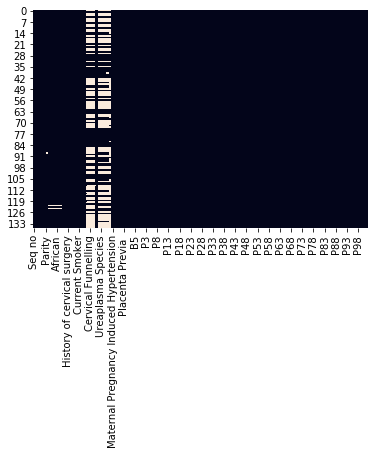

In [50]:
sns.heatmap(pd_frame_training.isnull(), cbar=False)

#### <font color='red'>Production:  </font>
 <font color='red'>__'Cervical Funnelling', 'Ureaplasma Species'__ are the top 2 features with most null values.</font>

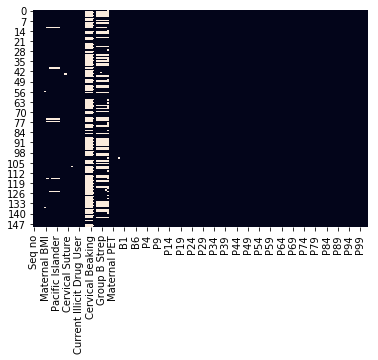

In [51]:
sns.heatmap(pd_frame_production.isnull(), cbar=False)

### Temporary exploration:

#### Training:

In [64]:
desc_training=pd_frame_training.drop(columns='Seq no').describe()
pd_frame_training.drop(columns='Seq no').describe()

,Gestational Age at Collection,Maternal Age at Recruitment / 1st Sample,Gravidity,Parity,Maternal BMI,B1,B2,B3,B4,B5,...,P93,P94,P95,P96,P97,P98,P99,P100,P101,P102
count,136.000000,136.000000,136.000000,136.000000,135.000000,136.000000,136.000000,136.000000,136.000000,136.000000,...,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,19.646912,33.465147,2.360294,0.698529,25.024222,554.494669,979.075364,5.214945,5.901148,97.346723,...,1.510662,5.033270,2.207566,1.156289,0.832671,1.363842,0.813380,2.003688,0.977115,1.178762
std,2.198234,4.074251,1.359045,0.743564,6.415595,518.024662,931.568661,10.794359,23.975894,153.863305,...,9.719974,45.304040,6.797987,1.933966,3.439037,8.068459,3.828599,5.685055,1.430292,1.410915
min,16.000000,19.400000,1.000000,0.000000,16.400000,3.125000,60.295946,0.003608,0.371777,6.519167,...,0.000136,0.000450,0.000005,0.000029,0.018401,0.000625,0.006927,0.001320,0.022867,0.000263
25%,17.710000,30.762500,1.000000,0.000000,21.000000,106.003250,198.467776,0.195664,1.793863,44.355049,...,0.009952,0.021774,0.004726,0.016173,0.161343,0.043803,0.097970,0.073376,0.296664,0.077842
50%,19.710000,33.375000,2.000000,1.000000,23.200000,323.507500,582.585700,2.983745,3.091631,74.683159,...,0.202774,0.457325,0.430157,0.352690,0.333220,0.267914,0.285882,0.689011,0.518669,0.493214
75%,21.360000,36.232500,3.000000,1.000000,27.000000,912.146750,1650.877450,8.025457,4.824558,126.215387,...,1.120935,2.040173,2.903092,1.827702,0.788932,1.031289,0.689580,2.332390,1.314885,1.934372
max,24.000000,43.510000,9.000000,3.000000,59.300000,1969.045000,3801.321700,120.710130,277.325219,1778.650800,...,113.211393,529.222079,76.552972,16.926530,40.104567,94.287664,44.547283,64.164284,14.187283,5.231499


#### Production:

In [65]:
desc_production=pd_frame_production.drop(columns='Seq no').describe()
pd_frame_production.drop(columns='Seq no').describe()

,Gestational Age at Collection,Maternal Age at Recruitment / 1st Sample,Gravidity,Parity,Maternal BMI,B1,B2,B3,B4,B5,...,P93,P94,P95,P96,P97,P98,P99,P100,P101,P102
count,150.000000,150.000000,150.000000,150.000000,148.000000,150.000000,150.000000,150.000000,150.000000,150.000000,...,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,19.310467,33.113733,2.473333,0.793333,25.015878,639.537762,748.615912,4.431144,8.986554,72.759349,...,2.331300,1.012640,1.359290,1.501509,1.509410,2.257934,1.768046,1.083891,1.072611,1.344479
std,1.688122,4.265422,1.629002,1.076264,5.389998,632.012514,770.417854,4.071459,27.958160,47.311200,...,8.643816,1.305455,1.859130,2.197537,5.661373,8.907370,6.294380,1.466311,1.566073,2.149451
min,16.000000,20.990000,1.000000,0.000000,16.200000,12.948000,33.659184,0.017049,0.078125,8.159083,...,0.000101,0.000947,0.000022,0.000099,0.002067,0.000072,0.001293,0.000502,0.001711,0.000058
25%,18.000000,30.175000,1.000000,0.000000,21.400000,143.719000,178.447500,0.675915,1.130384,38.729875,...,0.023556,0.057292,0.010133,0.070202,0.072833,0.014326,0.066029,0.037293,0.211314,0.032547
50%,19.430000,33.085000,2.000000,1.000000,23.750000,369.108441,378.217631,3.328432,2.183271,59.906343,...,0.135274,0.451799,0.390900,0.433052,0.218202,0.140734,0.203529,0.393042,0.598743,0.361657
75%,20.430000,35.947500,3.000000,1.000000,27.725000,1068.638832,1113.213755,8.113037,3.894073,98.462228,...,0.675443,1.532041,2.422641,1.973654,0.552411,0.607905,0.813658,1.480467,1.174113,1.422383
max,23.710000,42.650000,9.000000,7.000000,49.700000,2522.744000,4153.461818,15.398214,231.639327,248.654530,...,75.515202,6.740217,7.200691,9.562848,50.225228,77.922709,65.478317,6.755963,12.299685,9.585188


In [88]:
diff_rate = abs(desc_training-desc_production)/abs(desc_production)
#difference_locations = np.where(diff_rate>0.3)

changed = ne_stacked[(diff_rate>0).stack()]
changed.index.names = ['id', 'col']

#### <font color='red'>The following features are quite different between training and production datasets. </font>

In [86]:
diff_rate

,Gestational Age at Collection,Maternal Age at Recruitment / 1st Sample,Gravidity,Parity,Maternal BMI,B1,B2,B3,B4,B5,...,P93,P94,P95,P96,P97,P98,P99,P100,P101,P102
count,0.093333,0.093333,0.093333,0.093333,0.087838,0.093333,0.093333,0.093333,0.093333,0.093333,...,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333
mean,0.017423,0.010612,0.045703,0.119501,0.000334,0.132976,0.307847,0.176885,0.343336,0.337927,...,0.352009,3.970444,0.624058,0.229915,0.448347,0.395978,0.539956,0.848607,0.089031,0.123258
std,0.302178,0.044819,0.165719,0.309125,0.190278,0.180357,0.209173,1.651226,0.142437,2.252154,...,0.124500,33.703653,2.656542,0.119939,0.392544,0.094182,0.391743,2.877113,0.086702,0.343593
min,0.000000,0.075750,0.000000,NaN,0.012346,0.758650,0.791367,0.788375,3.758746,0.200993,...,0.343920,0.525445,0.769196,0.709220,7.904097,7.734763,4.358144,1.631660,12.365847,3.551886
25%,0.016111,0.019470,0.000000,NaN,0.018692,0.262427,0.112191,0.710519,0.586950,0.145241,...,0.577494,0.619950,0.533604,0.769629,1.215246,2.057560,0.483730,0.967569,0.403899,1.391672
50%,0.014411,0.008765,0.000000,0.000000,0.023158,0.123543,0.540345,0.103559,0.416055,0.246665,...,0.498989,0.012232,0.100427,0.185570,0.527119,0.903688,0.404629,0.753022,0.133737,0.363765
75%,0.045521,0.007928,0.000000,0.000000,0.026150,0.146441,0.482983,0.010795,0.238949,0.281866,...,0.659554,0.331670,0.198317,0.073950,0.428160,0.696464,0.152494,0.575442,0.119896,0.359952
max,0.012231,0.020164,0.000000,0.571429,0.193159,0.219483,0.084782,6.839229,0.197229,6.153100,...,0.499187,77.517070,9.631337,0.770030,0.201506,0.210015,0.319664,8.497430,0.153467,0.454210


### <font color='red'> Conclusions: </font>
- __1 column missed: <font color='red'> Gestational Category</font> at Delivery is missed in production.__
- __Difference in null values between T & P:__  
    - Traning top 2 features: <font color='red'>'Cervical Sludge', 'Candida/Fungal Species'</font>;  
    - Production top 2 features: <font color='red'>'Cervical Funnelling', 'Ureaplasma Species'</font>.  
- __Some features have great difference in description information between T & P:__  
    __e.g.:__  
     'Gestational Age at Collection' difference in 'std' between T & P is <font color='red'>0.302178</font>.  
     'B1' difference in 'min' between T & P is <font color='red'>0.758650</font>.  
     'B2' difference in '50%' between T & P is <font color='red'>0.540345</font>.
        